<a href="https://colab.research.google.com/github/sharonjoshy/Pima_Indians_Diabetes_Project/blob/main/Pima_Indians_Diabetes_Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Libraries

In [33]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Loading Data

In [34]:


df = pd.read_csv("/content/drive/MyDrive/Luminar_Projects/Project_1/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Bsic EDA

In [35]:
# Checking unique values in Target Varible

df["Outcome"].unique()

array([1, 0])

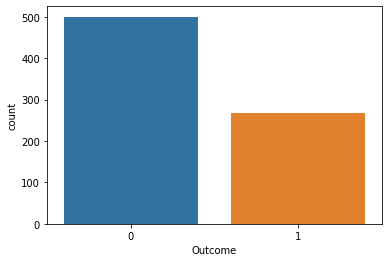

In [36]:
# plotting the target varible

sns.countplot(x="Outcome",data=df)
plt.show()

In [37]:
# checking value count

df["Outcome"].value_counts()  # it is an inbalanced data

0    500
1    268
Name: Outcome, dtype: int64

In [38]:
# shape of the dataset
df.shape

(768, 9)

In [39]:
# Dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [40]:
# identify missing values

df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [41]:
# describing the data

df.describe().T           # there should be no zero

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [42]:
# correlation

df.corr()["Outcome"]

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

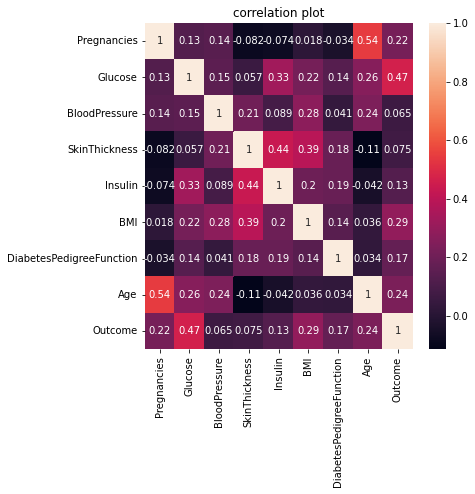

In [43]:
# correlation using Heatmap

plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True)
plt.title("correlation plot")
plt.show()

In [44]:
# pairplot

#sns.pairplot(df,hue="Outcome")

In [45]:
df[df["Glucose"]==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [46]:
#  Total zero values

print("Total zero Glucose values:" + str(df[df["Glucose"]==0].shape[0]))
print("Total zero BloodPressure values:" + str(df[df["BloodPressure"]==0].shape[0]))
print("Total zero SkinThickness values:" + str(df[df["SkinThickness"]==0].shape[0]))
print("Total zero Insulin values:" + str(df[df["Insulin"]==0].shape[0]))
print("Total zero  BMI values:" + str(df[df["BMI"]==0].shape[0]))
print("Total zero DiabetesPedigreeFunction values:" + str(df[df["DiabetesPedigreeFunction"]==0].shape[0]))
print("Total zero Age values:" + str(df[df["Age"]==0].shape[0]))

Total zero Glucose values:5
Total zero BloodPressure values:35
Total zero SkinThickness values:227
Total zero Insulin values:374
Total zero  BMI values:11
Total zero DiabetesPedigreeFunction values:0
Total zero Age values:0


# missing value treatment

In [47]:
df["Glucose"].loc[(df['Glucose']==0)]=df["Glucose"].median()
df["SkinThickness"].loc[(df['SkinThickness']==0)]=df["SkinThickness"].median()
df["BloodPressure"].loc[(df['BloodPressure']==0)]=df["BloodPressure"].median()
df["Insulin"].loc[(df['Insulin']==0)]=df["Insulin"].median()
df["BMI"].loc[(df['BMI']==0)]=df["BMI"].median()
df["DiabetesPedigreeFunction"].loc[(df['DiabetesPedigreeFunction']==0)]=df["DiabetesPedigreeFunction"].median()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

# Outlier Treatment

In [48]:
numericalcol = df.select_dtypes(include=np.number).columns
numericalcol

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [49]:
descretecols=[]
continuescols=[]

for column in numericalcol:
  if df[column].nunique()>20:
    continuescols.append(column)
  else:
    descretecols.append(column)

In [50]:
continuescols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [51]:
for column in continuescols:
  upper_lim = df[column].mean()+df[column].std()*3
  lower_lim = df[column].mean()-df[column].std()*3

  df.loc[(df[column] > upper_lim),column] = upper_lim
  df.loc[(df[column] > lower_lim),column] = lower_lim

# Train Test Split

In [52]:
X =df.drop(['Outcome'],axis=1)
y =df["Outcome"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

# Scale Down

In [53]:
scale=StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

In [61]:
import joblib
joblib.dump(scale,'/content/drive/MyDrive/Luminar_Projects/Project_1/scale.pk')

['/content/drive/MyDrive/Luminar_Projects/Project_1/scale.pk']

# Apply all Classification Algorithms

In [54]:
lr_clf = LogisticRegression()
df_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
adaboost_clf = AdaBoostClassifier()
grad_clf = GradientBoostingClassifier()
svc_clf = SVC()

voting = VotingClassifier(estimators=[('Logistic_Regression',lr_clf),('Decision_tree_clf',df_clf),('Random_forest',rf_clf),
                                       ('adaboost_clf',adaboost_clf),('gradent_boost',grad_clf),('SVC',svc_clf)], voting='hard')



In [55]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('Logistic_Regression', LogisticRegression()),
                             ('Decision_tree_clf', DecisionTreeClassifier()),
                             ('Random_forest', RandomForestClassifier()),
                             ('adaboost_clf', AdaBoostClassifier()),
                             ('gradent_boost', GradientBoostingClassifier()),
                             ('SVC', SVC())])

In [56]:
for clf in (lr_clf,df_clf,rf_clf,adaboost_clf,grad_clf,svc_clf):
    clf.fit(X_train,y_train)

    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,clf.score(X_train,y_train))
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

    
    
    print("************************")

LogisticRegression 0.6759776536312849
LogisticRegression 0.6363636363636364
************************
DecisionTreeClassifier 0.707635009310987
DecisionTreeClassifier 0.6190476190476191
************************
RandomForestClassifier 0.707635009310987
RandomForestClassifier 0.6190476190476191
************************
AdaBoostClassifier 0.707635009310987
AdaBoostClassifier 0.6190476190476191
************************
GradientBoostingClassifier 0.707635009310987
GradientBoostingClassifier 0.6190476190476191
************************
SVC 0.6629422718808193
SVC 0.6233766233766234
************************


# HyperParameter tuning

In [57]:
lr_clf = LogisticRegression()
df_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
adaboost_clf = AdaBoostClassifier()
grad_clf = GradientBoostingClassifier()
svc_clf = SVC()


clf_lst = [lr_clf,df_clf,rf_clf,adaboost_clf,grad_clf,svc_clf]

grid_params_lr= [{'penalty':['l1','l2'],'solver':['saga']}]

grid_params_df =[{'criterion':["gini","entropy"], 'splitter':['best','random'],'max_depth':[3,4,5],'min_samples_split':[2,3,4],'max_features':["auto","sqrt","log2"]}]

grid_params_rf=[{'n_estimators': [4, 6, 9], 'max_features': ['log2', 'sqrt','auto'], 'criterion': ['entropy', 'gini'],'max_depth': [2, 3, 5, 10]}]

grid_params_adboost=[{'n_estimators':[10,50,250,1000],'learning_rate':[0.01,0.1],}]

grid_params_grad=[{'loss':['deviance', 'exponential'],'learning_rate':[1,7,9],'criterion':['friedman_mse','squared_error']}]

grid_params_svc=[{'kernel':['linear','poly','rbf'],'degree':[3,4,5]}]



clf_params=[grid_params_lr,grid_params_df,grid_params_rf,grid_params_adboost,grid_params_grad,grid_params_svc]



In [58]:
# zip function

for clf,clf_par in zip(clf_lst,clf_params):
  print(f"The Classifier {clf} and its hyper params are {clf_par}")

  grid_clf = GridSearchCV(estimator=clf,param_grid=clf_par,scoring="accuracy",cv=10)
  grid_clf.fit(X_train_scaled,y_train)

  print(f"The train accuracy for the {clf} is {grid_clf.score(X_train_scaled,y_train)}")
  
  print(f"The test accuracy for the {clf} is {grid_clf.score(X_test_scaled,y_test)}")

  print(f"The best params for the {clf} is {grid_clf.best_params_}")

  print("===============================")

The Classifier LogisticRegression() and its hyper params are [{'penalty': ['l1', 'l2'], 'solver': ['saga']}]
The train accuracy for the LogisticRegression() is 0.6759776536312849
The test accuracy for the LogisticRegression() is 0.6363636363636364
The best params for the LogisticRegression() is {'penalty': 'l1', 'solver': 'saga'}
The Classifier DecisionTreeClassifier() and its hyper params are [{'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [3, 4, 5], 'min_samples_split': [2, 3, 4], 'max_features': ['auto', 'sqrt', 'log2']}]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


The train accuracy for the DecisionTreeClassifier() is 0.6685288640595903
The test accuracy for the DecisionTreeClassifier() is 0.6277056277056277
The best params for the DecisionTreeClassifier() is {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_split': 4, 'splitter': 'random'}
The Classifier RandomForestClassifier() and its hyper params are [{'n_estimators': [4, 6, 9], 'max_features': ['log2', 'sqrt', 'auto'], 'criterion': ['entropy', 'gini'], 'max_depth': [2, 3, 5, 10]}]
The train accuracy for the RandomForestClassifier() is 0.702048417132216
The test accuracy for the RandomForestClassifier() is 0.6233766233766234
The best params for the RandomForestClassifier() is {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'n_estimators': 4}
The Classifier AdaBoostClassifier() and its hyper params are [{'n_estimators': [10, 50, 250, 1000], 'learning_rate': [0.01, 0.1]}]
The train accuracy for the AdaBoostClassifier() is 0.702048417132216
The test accura

In [59]:
# Making the best model - Decision Tree classifier

dec_clf = DecisionTreeClassifier(criterion='gini',max_depth= 4,max_features='log2',min_samples_split=3,splitter='best')

dec_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_features='log2', min_samples_split=3)

In [60]:
# Pickle file

import joblib
joblib.dump(dec_clf,'/content/drive/MyDrive/Luminar_Projects/Project_1/model.pk')

['/content/drive/MyDrive/Luminar_Projects/Project_1/model.pk']